# EDA

In this notebook, do some analysis regarding trends in the data

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pickle
import time
import seaborn as sns
import math


pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/1500_sentiment_api.csv')
df.head()

id  latitude  longitude  price shared_status  accommodates  \
0      177  39.69551 -104.92489   79.0   entire home             2   
1      360  39.76758 -105.00316  133.0   entire home             3   
2  2361919  39.77960 -105.03859   76.0   entire home             2   
3  2386289  39.76777 -105.03529  150.0   entire home             4   
4  4992412  39.76822 -105.00249   73.0  private room             2   

  accomodation_group  bathrooms  bedrooms  beds_adjusted      neighborhood  \
0                0-2        1.0       1.0            1.0  Virginia Village   
1                3-4        1.0       2.0            2.0          Highland   
2                0-2        1.0       1.0            1.0          Berkeley   
3                3-4        1.0       1.0            1.0     West Highland   
4                0-2        2.0       1.0            1.0          Highland   

   has_neighborhood_overview  has_reviews  \
0                          1            1   
1                          1            1   
2                          1            1   
3                          1            1   
4                          1            0   

                            listing_url  host_in_CO  \
0      https://www.airbnb.com/rooms/177           1   
1      https://www.airbnb.com/rooms/360           1   
2  https://www.airbnb.com/rooms/2361919           1   
3  https://www.airbnb.com/rooms/2386289           1   
4  https://www.airbnb.com/rooms/4992412           1   

   host_lives_in_neighborhood  host_id            host_name  \
0                           1      615                  Joe   
1                           1      666  Jennifer & Giovanni   
2                           1  5811115              Annette   
3                           1   184771              Melanie   
4                           1  5181201       Danno & Rachel   

   host_response_time  host_response_rate  host_acceptance_rate  \
0      within an hour                 1.0                  1.00   
1      within an hour                 1.0                  0.87   
2  within a few hours                 1.0                  0.81   
3                 NaN                 NaN                  1.00   
4                 NaN                 NaN                  0.00   

   host_is_superhost host_neighbourhood  host_listings_count  \
0                1.0   Virginia Village                  2.0   
1                1.0           Highland                  4.0   
2                1.0           Berkeley                  5.0   
3                0.0      West Highland                  1.0   
4                0.0           Highland                  3.0   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                        2.0                   1.0                     0.0   
1                        4.0                   1.0                     1.0   
2                        6.0                   1.0                     0.0   
3                        2.0                   1.0                     1.0   
4                        4.0                   1.0                     1.0   

   has_host_about  years_hosting  years_of_reviews  license_listed  \
0               1           15.0               6.0               1   
1               1           15.0               4.0               1   
2               1           10.0               8.0               0   
3               1           13.0               8.0               1   
4               1           10.0               0.0               0   

   response_time  host_lives_in_neighborhood.1  \
0            0.0                             1   
1            0.0                             1   
2            1.0                             1   
3            4.0                             1   
4            4.0                             1   

                                                name  \
0   Tiny Home in the Heart of the City- ECO FRIENDLY   
1  Sit in the Peaceful Garden of the Chickadee

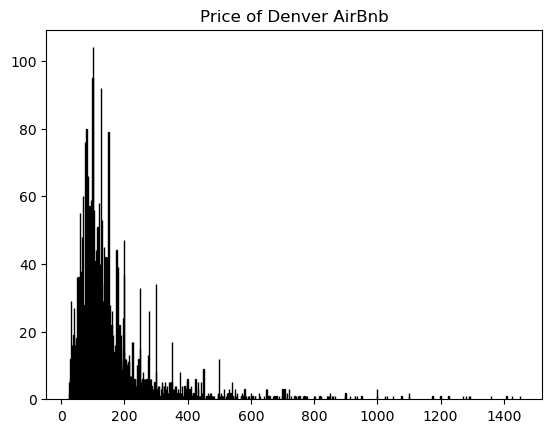

In [3]:
categories = df['price'].value_counts().head(1000).index
counts = df['price'].value_counts().head(1000).values
plt.title('Price of Denver AirBnb')
fig=plt.bar(categories, counts , edgecolor='black', color='#72b3a5')
# plt.rcParams["figure.edgecolor"] = "#FAEEDA"
# plt.rcParams["figure.facecolor"] = "#FAEEDA"
plt.show()

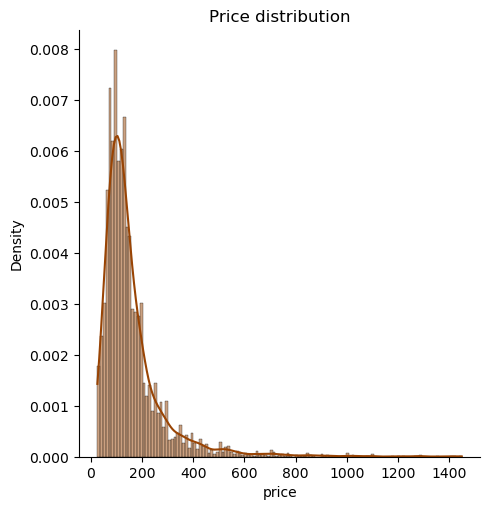

In [4]:

sns.displot(df['price'], kde=True, stat="density", color='#994404')
plt.title("Price distribution");

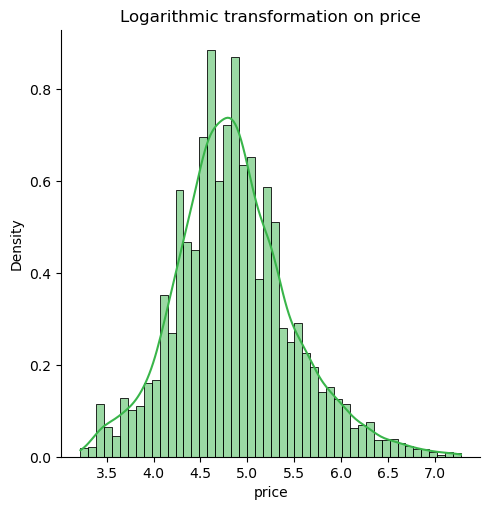

In [5]:

sns.displot(np.log(df['price']), kde=True, stat="density", color='#39b54a')
plt.title("Logarithmic transformation on price");

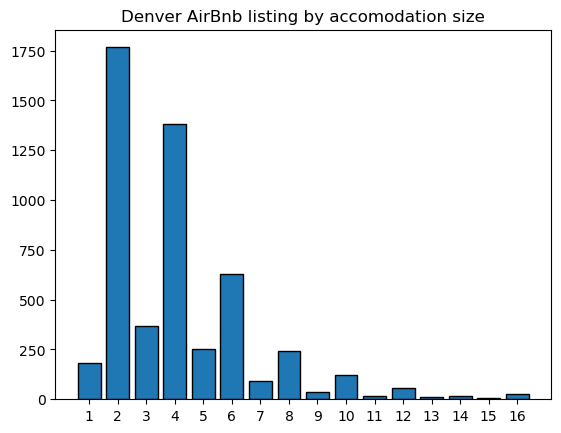

''

In [6]:
categories = df['accommodates'].value_counts().index
counts = df['accommodates'].value_counts().values
plt.title('Denver AirBnb listing by accomodation size')
fig=plt.bar(categories, counts, edgecolor='black') #color='#525C30', 
plt.rcParams["figure.edgecolor"] = "#FAEEDA"
plt.xticks(np.arange(1, 17, 1)) 
plt.show()
;

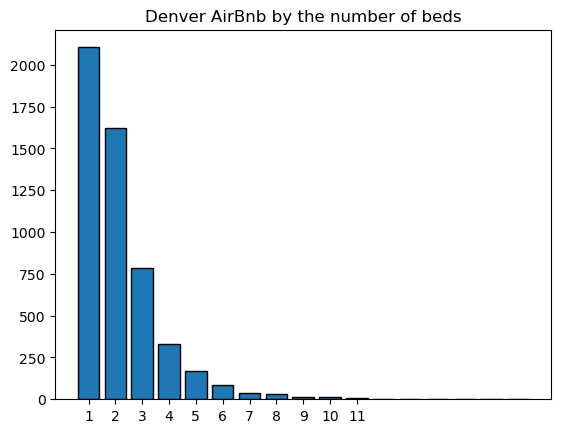

''

In [7]:
categories = df['beds_adjusted'].value_counts().index
counts = df['beds_adjusted'].value_counts().values
plt.title('Denver AirBnb by the number of beds')
fig=plt.bar(categories, counts, edgecolor='black') #color='#525C30', )
plt.rcParams["figure.edgecolor"] = "#FAEEDA"
plt.xticks(np.arange(1, 12, 1)) 
plt.show()
;

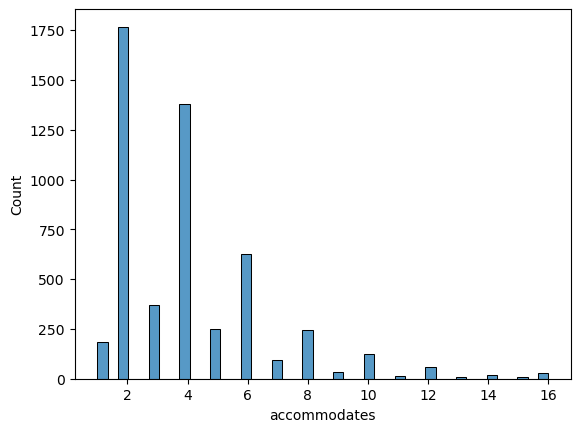

In [8]:
sns.histplot(df['accommodates']);

In [9]:
bins=[0,2,4,6,8, np.inf]

names=['0-2', '3-4', '5-6','6-7','8+']

df['group_size']=pd.cut(df['accommodates'], bins, labels=names)

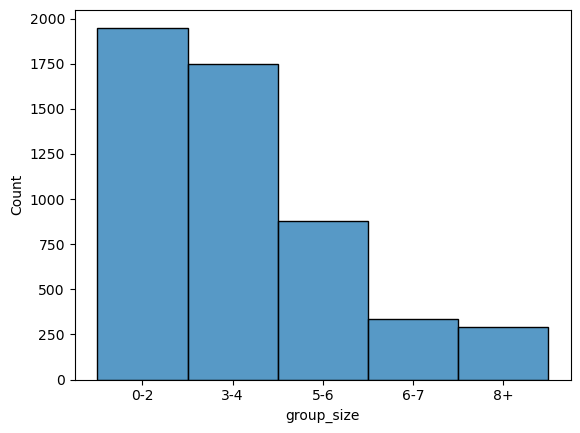

In [10]:
sns.histplot(df['group_size']);

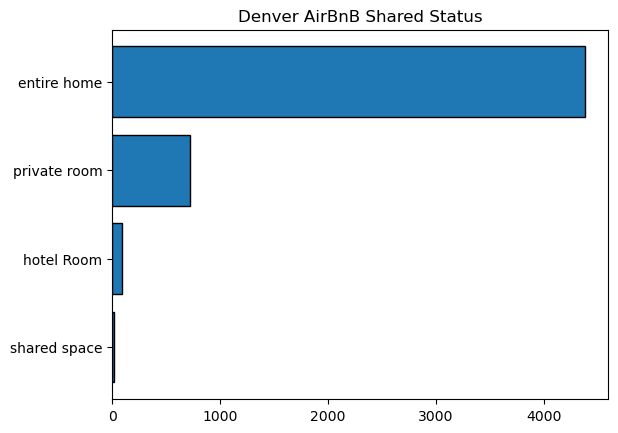

In [11]:
categories = df['shared_status'].value_counts().index
counts = df['shared_status'].value_counts().values
plt.title('Denver AirBnB Shared Status')
fig=plt.barh(categories, counts, edgecolor='black') #color='#525C30', 
plt.gca().invert_yaxis()
plt.show();

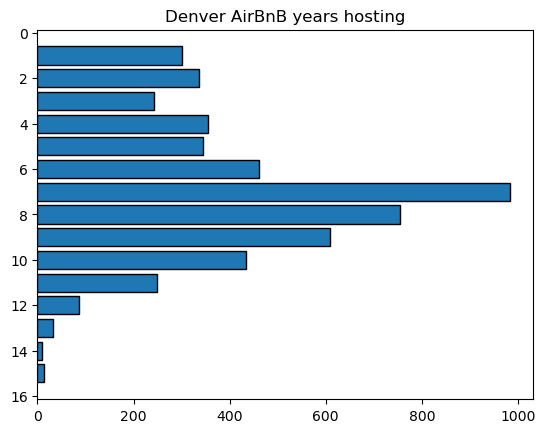

In [12]:
categories = df['years_hosting'].value_counts().index
counts = df['years_hosting'].value_counts().values
plt.title('Denver AirBnB years hosting')
fig=plt.barh(categories, counts, edgecolor='black') #color='#525C30', 
plt.gca().invert_yaxis()
plt.show();

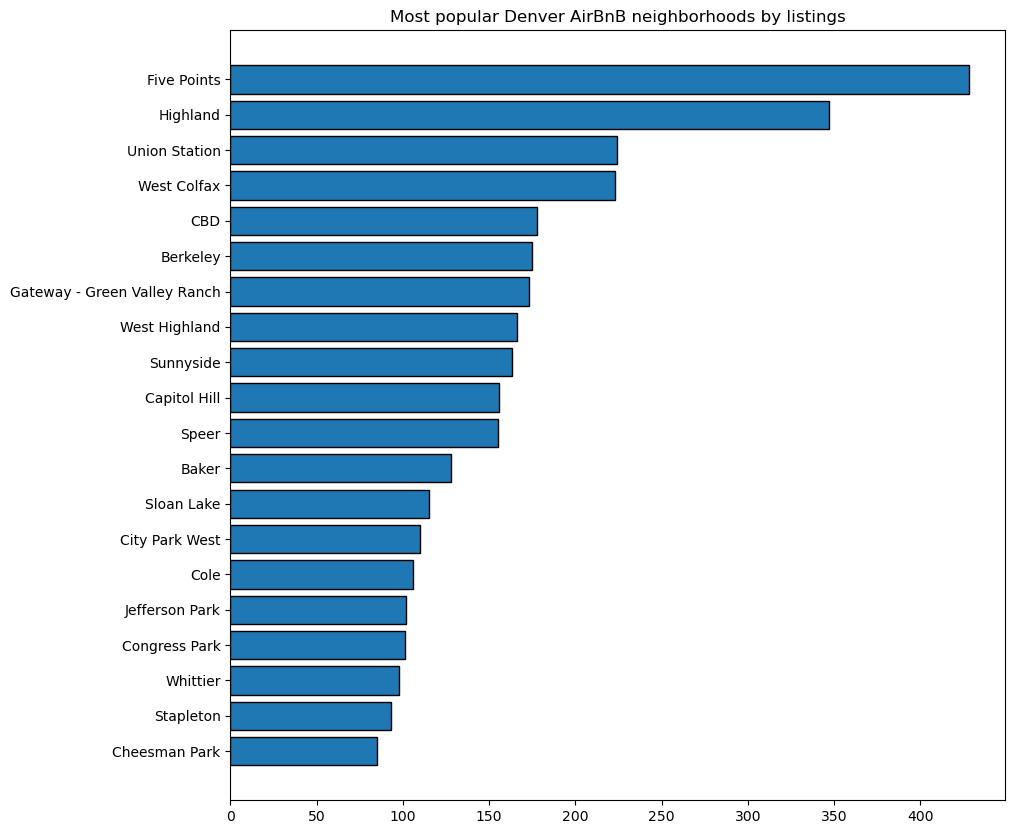

In [13]:
plt.figure(figsize=(10,10))
categories = df['neighborhood'].value_counts().head(20).index
counts = df['neighborhood'].value_counts().head(20).values
plt.title('Most popular Denver AirBnB neighborhoods by listings')
fig=plt.barh(categories, counts, edgecolor='black')   #color='#525C30',
plt.gca().invert_yaxis()
plt.show();

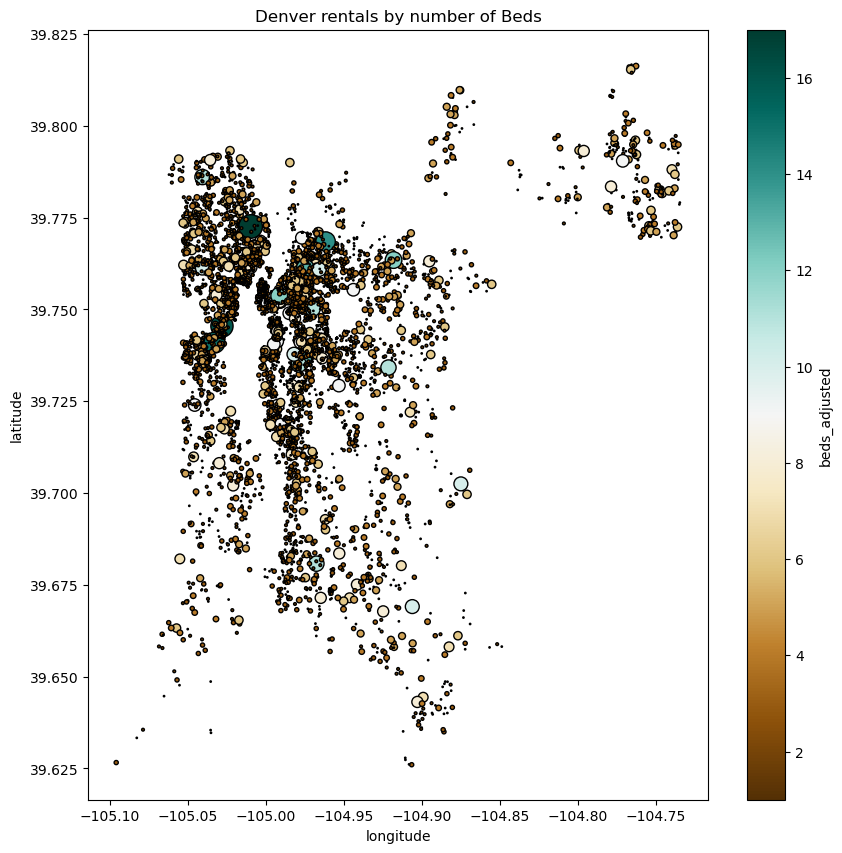

In [14]:
df.plot(kind='scatter',
       x='longitude',
        y='latitude',
        c='beds_adjusted',
        cmap='BrBG',
        #i'd rather not use a continous scale.. but like the systematic shading...  
        edgecolors='black',
        figsize=(10,10),
        s= df['beds_adjusted']**2
        
       )
plt.title('Denver rentals by number of Beds')
plt.rcParams['axes.facecolor'] = 'white'
plt.show()


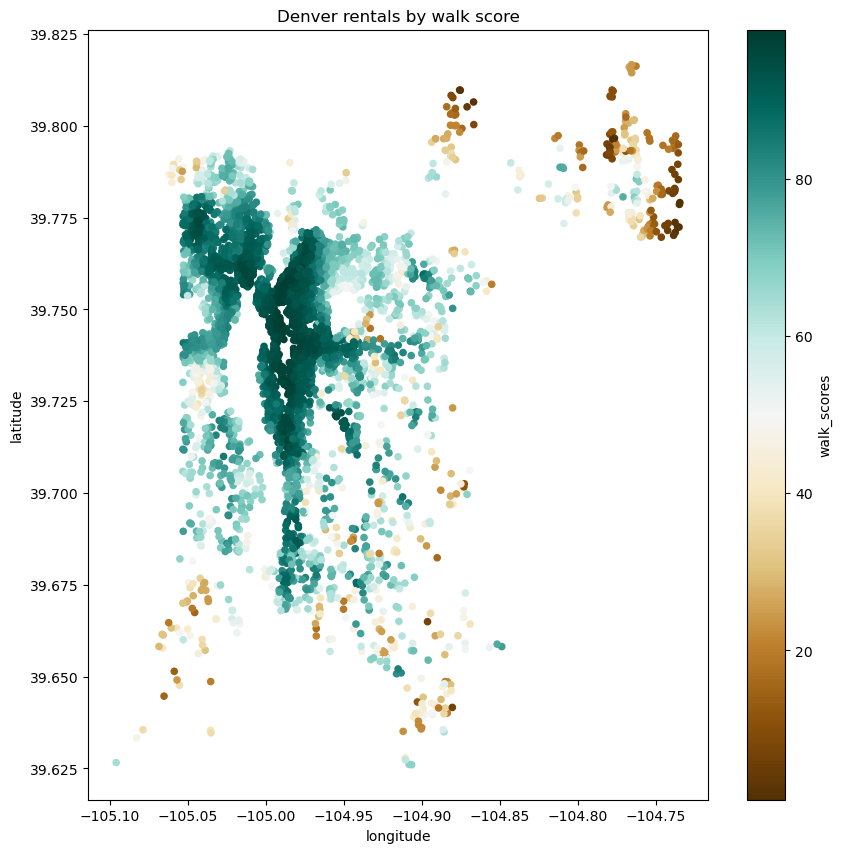

In [15]:
df.plot(kind='scatter',
       x='longitude',
        y='latitude',
        c='walk_scores',
        cmap='BrBG',
        #i'd rather not use a continous scale.. but like the systematic shading...  
        # edgecolors='black',
        figsize=(10,10),
        s= 20
        
       )
plt.title('Denver rentals by walk score')
plt.rcParams['axes.facecolor'] = 'white'
plt.show()


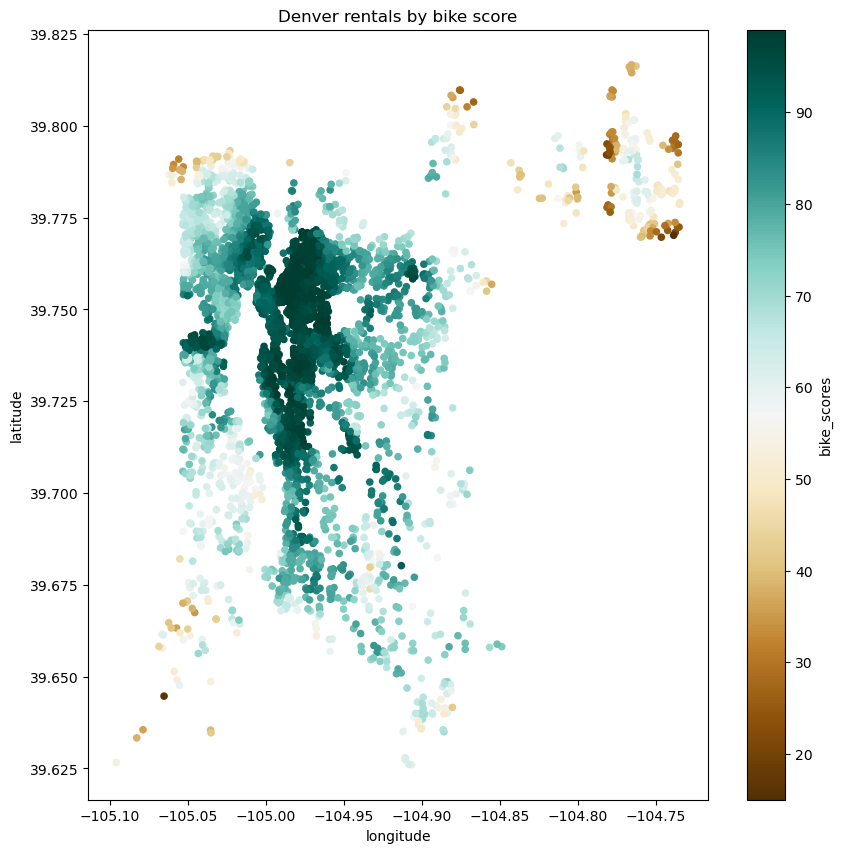

In [16]:
df.plot(kind='scatter',
       x='longitude',
        y='latitude',
        c='bike_scores',
        cmap='BrBG',
        #i'd rather not use a continous scale.. but like the systematic shading...  
        # edgecolors='black',
        figsize=(10,10),
        s= 20
        
       )
plt.title('Denver rentals by bike score')
plt.rcParams['axes.facecolor'] = 'white'
plt.show()


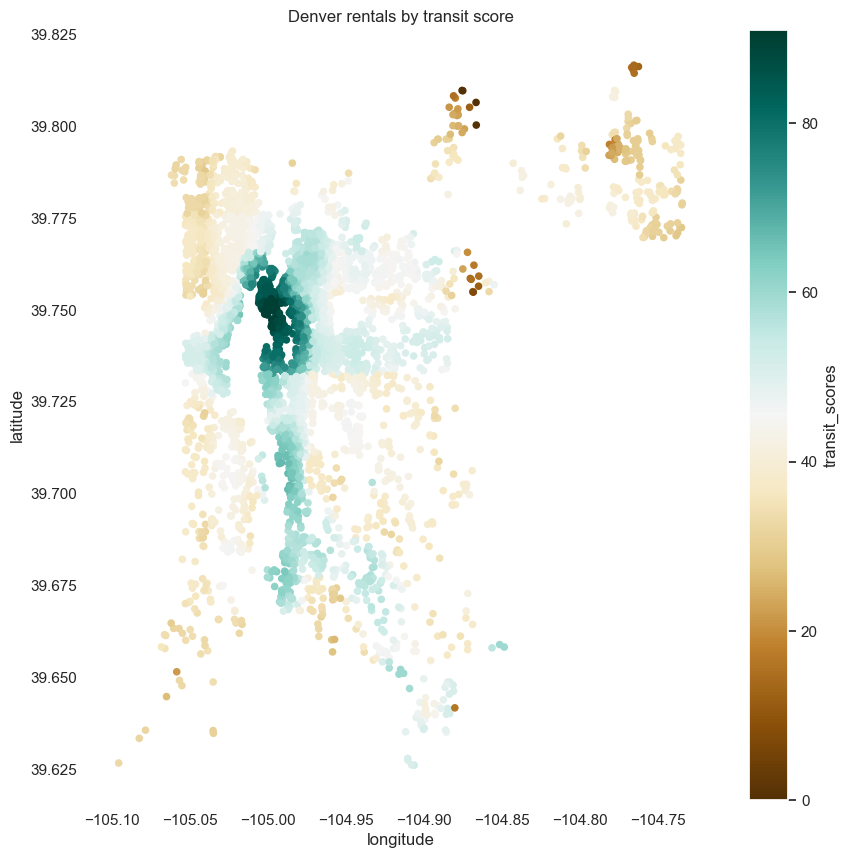

In [36]:
df.plot(kind='scatter',
       x='longitude',
        y='latitude',
        c='transit_scores',
        cmap='BrBG',
        #i'd rather not use a continous scale.. but like the systematic shading...  
        # edgecolors='black',
        figsize=(10,10),
        s= 20
        
       )
plt.title('Denver rentals by transit score')
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

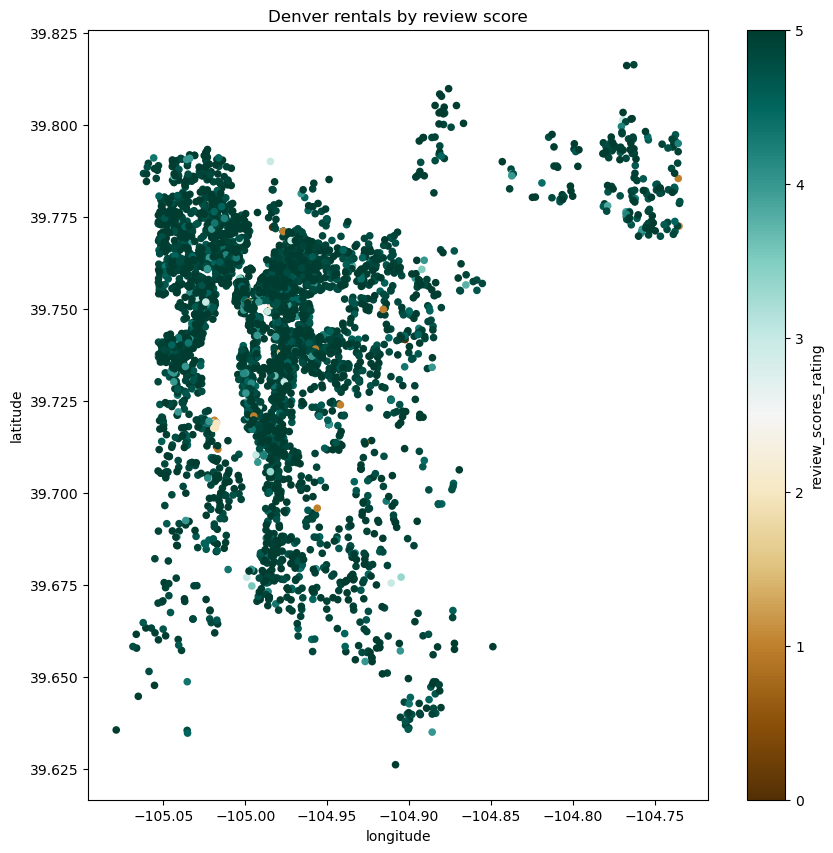

In [17]:
df.plot(kind='scatter',
       x='longitude',
        y='latitude',
        c='review_scores_rating',
        cmap='BrBG',
        #i'd rather not use a continous scale.. but like the systematic shading...  
        # edgecolors='black',
        figsize=(10,10),
        s= 20
        
       )
plt.title('Denver rentals by review score')
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

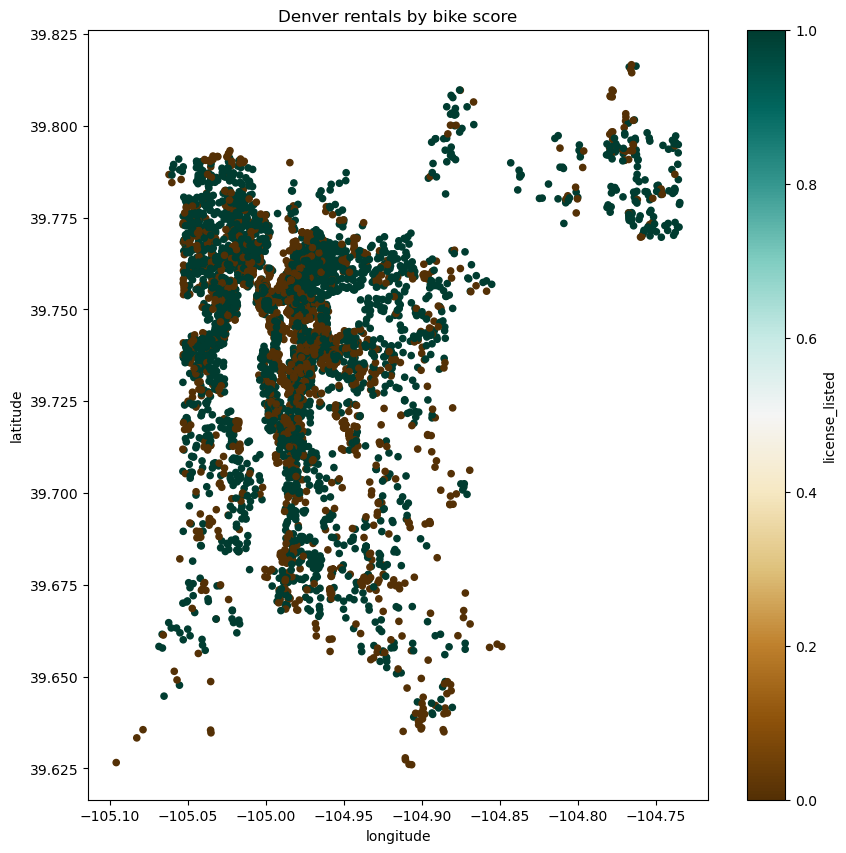

In [18]:
df.plot(kind='scatter',
       x='longitude',
        y='latitude',
        c='license_listed',
        cmap='BrBG',
        #i'd rather not use a continous scale.. but like the systematic shading...  
        # edgecolors='black',
        figsize=(10,10),
        s= 20
        
       )
plt.title('Denver rentals by bike score')
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

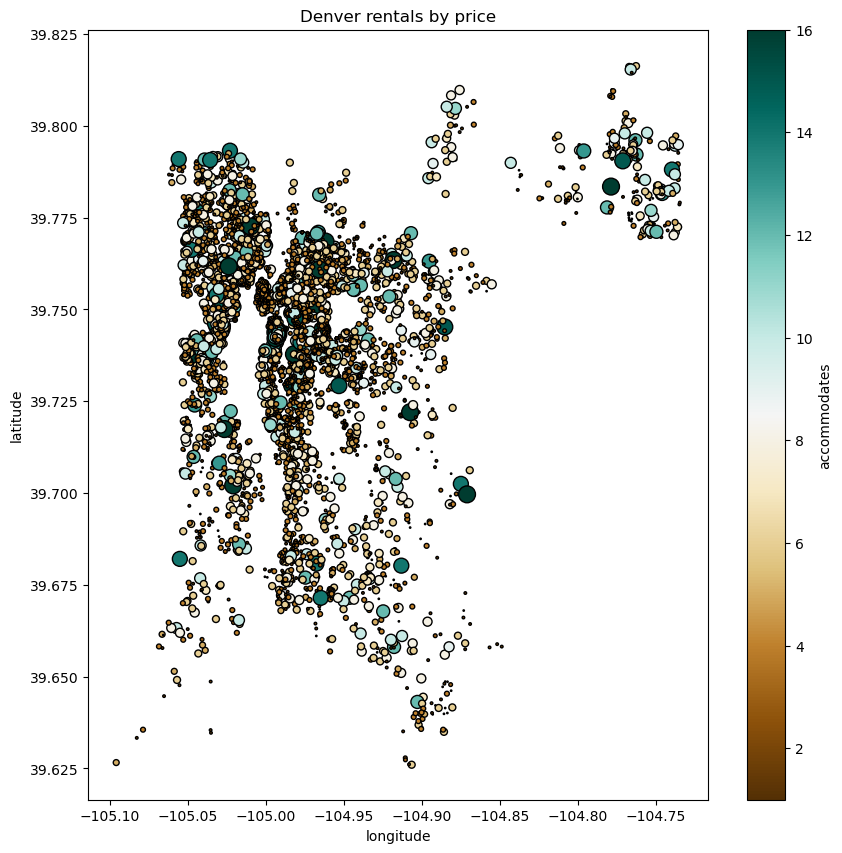

In [19]:
df.plot(kind='scatter',
       x='longitude',
        y='latitude',
        c='accommodates',
        cmap='BrBG',
        edgecolors='black',
        figsize=(10,10),
        s= df['accommodates']**1.8
        
       )
plt.title('Denver rentals by price')
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

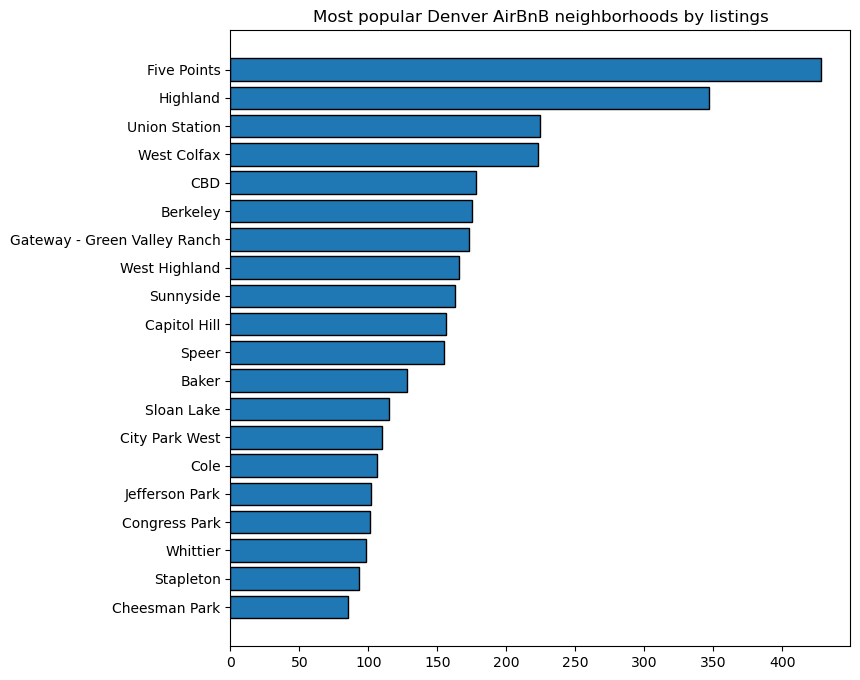

In [20]:
plt.figure(figsize=(8,8))
categories = df['neighborhood'].value_counts().head(20).index
counts = df['neighborhood'].value_counts().head(20).values
plt.title('Most popular Denver AirBnB neighborhoods by listings')
fig=plt.barh(categories, counts, edgecolor='black') 
plt.gca().invert_yaxis()
plt.show();

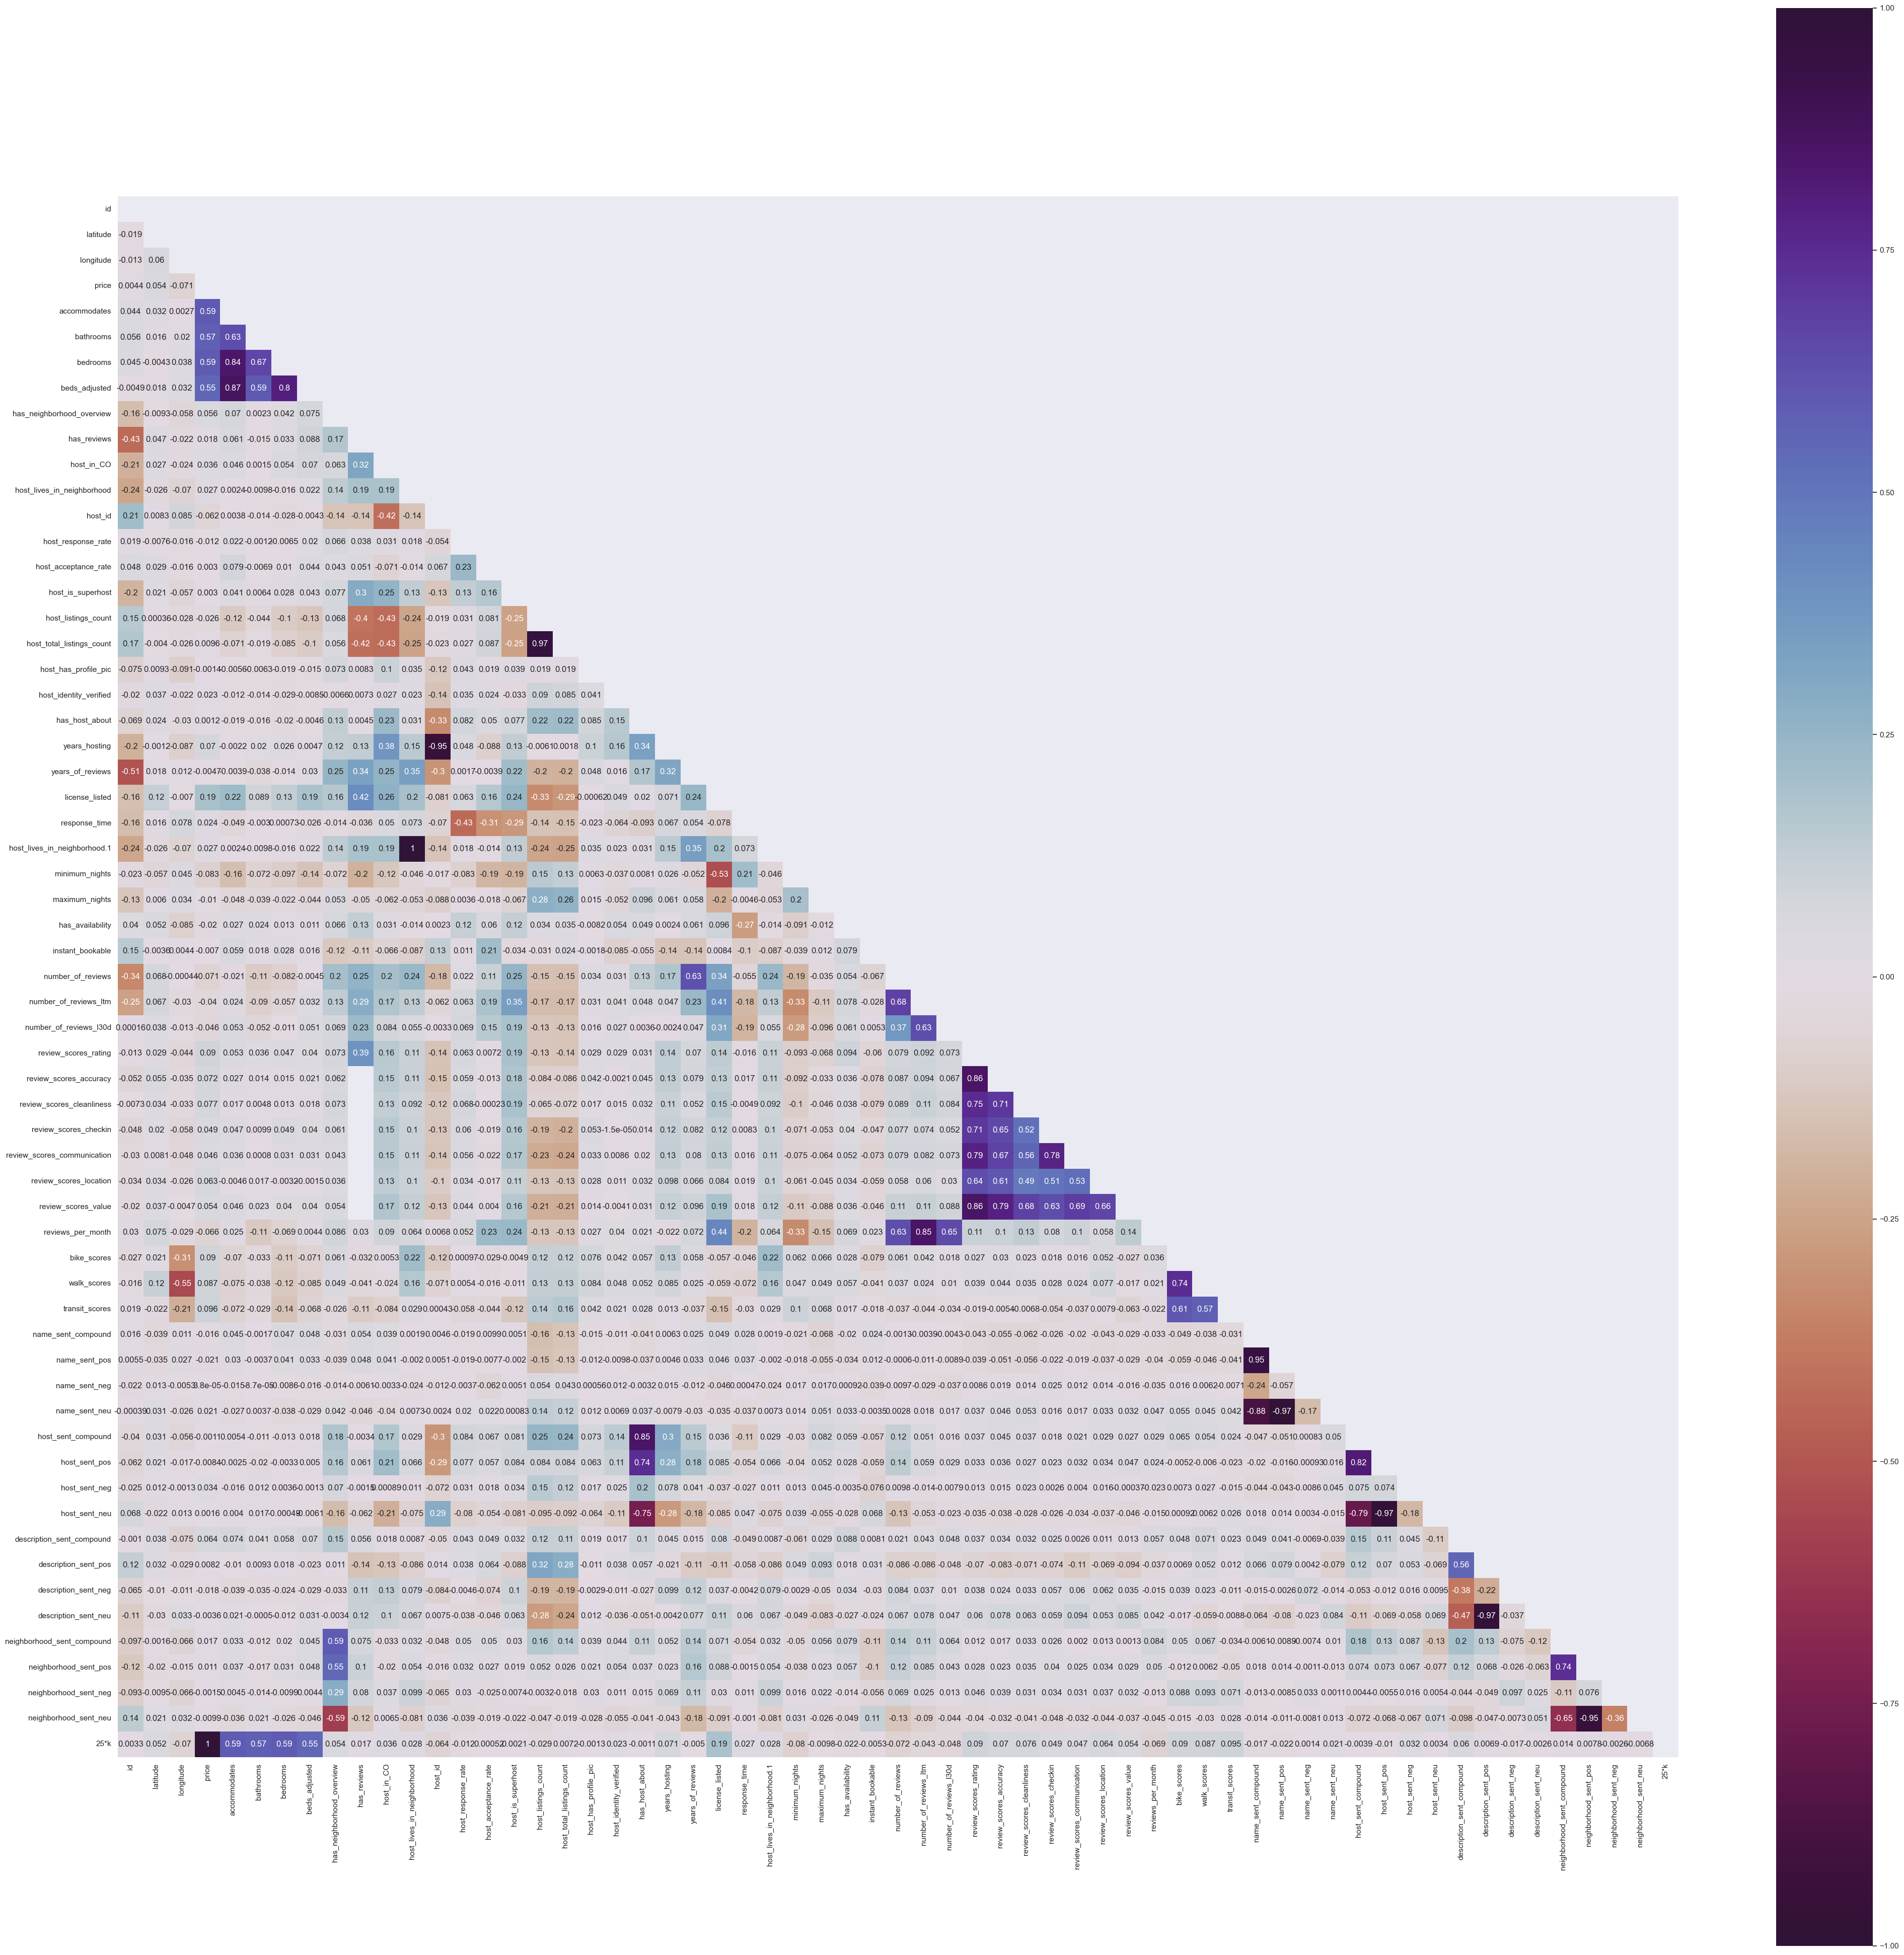

In [21]:
plt.figure(figsize = (50,50))

corr = df.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=1)
# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, mask = mask, square = True, cmap = 'twilight_shifted_r', annot = True, vmin = -1, vmax = 1);


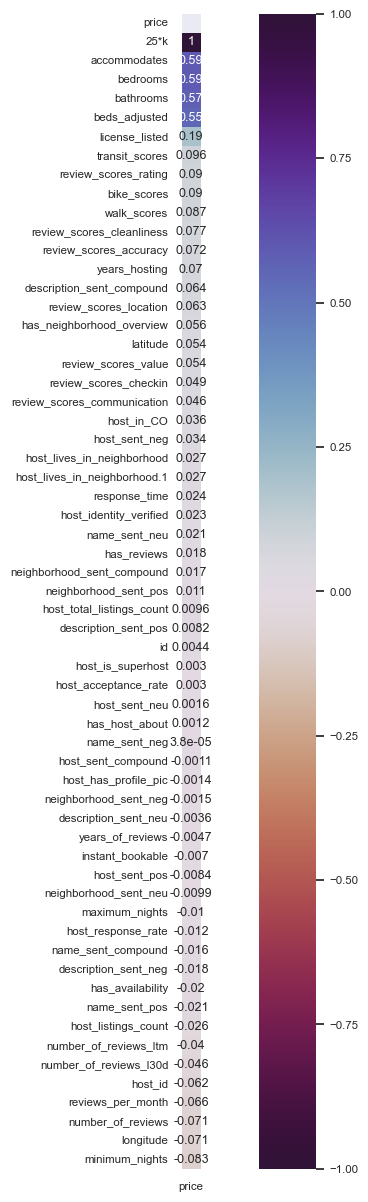

In [22]:
plt.figure(figsize = (15,15))

corr = df.corr()[['price']].sort_values("price", ascending=False)

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.set(font_scale=.75)
# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr, mask = mask, square = True, cmap = 'twilight_shifted_r', annot = True, vmin = -1, vmax = 1);

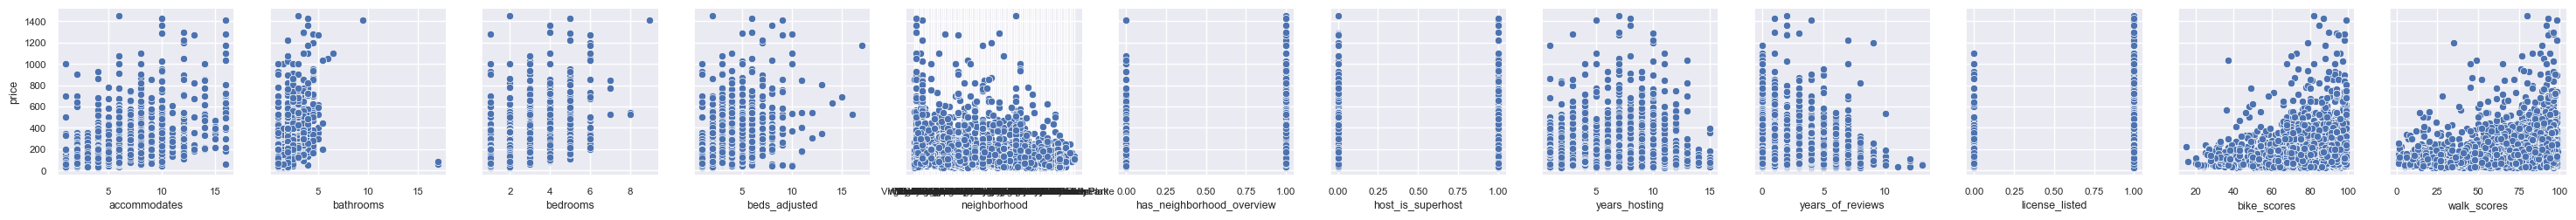

In [23]:
sns.pairplot(df, x_vars=['accommodates', 'bathrooms', 'bedrooms', 'beds_adjusted', 'neighborhood',
       'has_neighborhood_overview', 'host_is_superhost' , 'years_hosting' , 'years_of_reviews' , 'license_listed',
        'bike_scores', 'walk_scores'], y_vars=['price']);

In [24]:
df.columns

Index(['id', 'latitude', 'longitude', 'price', 'shared_status', 'accommodates',
       'accomodation_group', 'bathrooms', 'bedrooms', 'beds_adjusted',
       'neighborhood', 'has_neighborhood_overview', 'has_reviews',
       'listing_url', 'host_in_CO', 'host_lives_in_neighborhood', 'host_id',
       'host_name', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'has_host_about',
       'years_hosting', 'years_of_reviews', 'license_listed', 'response_time',
       'host_lives_in_neighborhood.1', 'name', 'host_about', 'description',
       'neighborhood_overview', 'amenities', 'minimum_nights',
       'maximum_nights', 'min_stay_group', 'max_stay_group',
       'has_availability', 'instant_bookable', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating

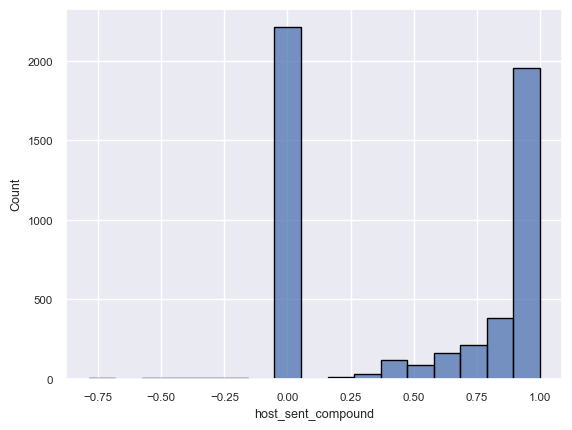

In [25]:
sns.histplot(df['host_sent_compound'], edgecolor='black')
sns.set(font_scale=1);

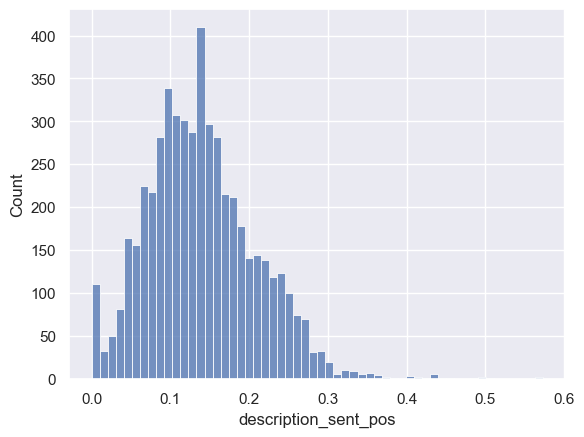

In [26]:
sns.histplot(df['description_sent_pos']);

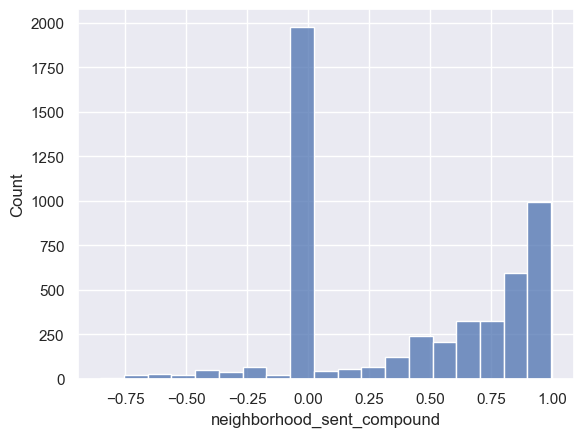

In [27]:
sns.histplot(df['neighborhood_sent_compound']);

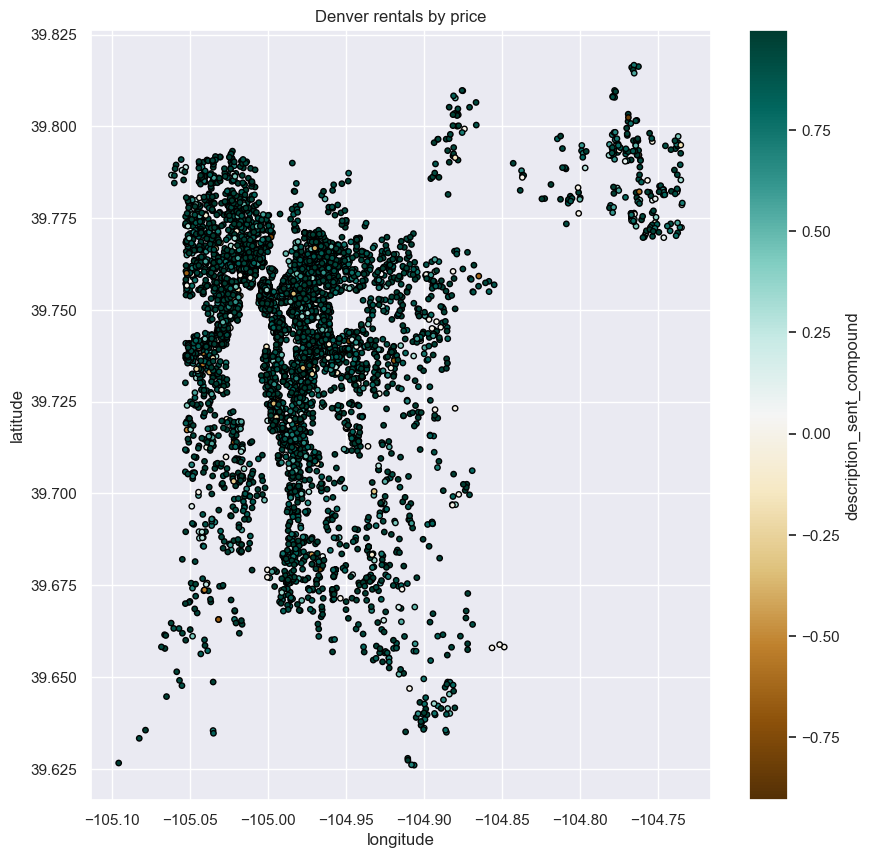

In [28]:
df.plot(kind='scatter',
       x='longitude',
        y='latitude',
        c='description_sent_compound',
        cmap='BrBG',
        edgecolors='black',
        figsize=(10,10),
        s= 15
        
       )
plt.title('Denver rentals by price')
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

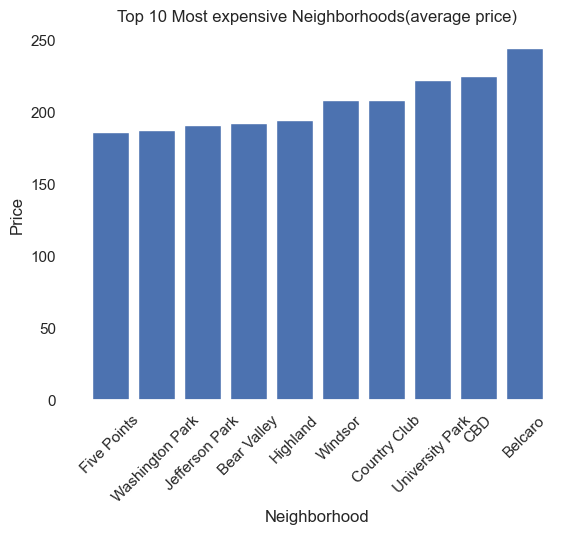

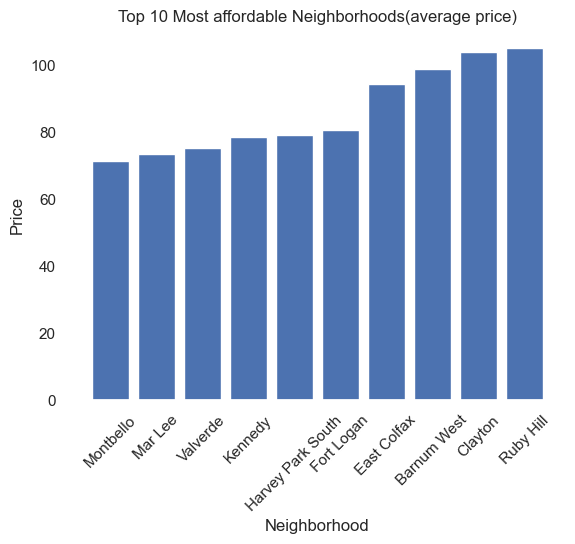

In [29]:
grouped = df.groupby('neighborhood')['price'].mean()

# Select the 10 priciest and 10 cheapest neighborhoods
top_10 = grouped.nlargest(10)
bottom_10 = grouped.nsmallest(10)

# Create a scatter plot of the top 10 neighborhoods
plt.bar(top_10.index, top_10.values)
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Top 10 Most expensive Neighborhoods(average price)')
plt.gca().invert_xaxis()
plt.xticks(rotation=45)


# Display the plot
plt.show()

# Create a scatter plot of the bottom 10 neighborhoods
plt.bar(bottom_10.index, bottom_10.values)
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Top 10 Most affordable Neighborhoods(average price)')
plt.xticks(rotation=45)


# Display the plot
plt.show()

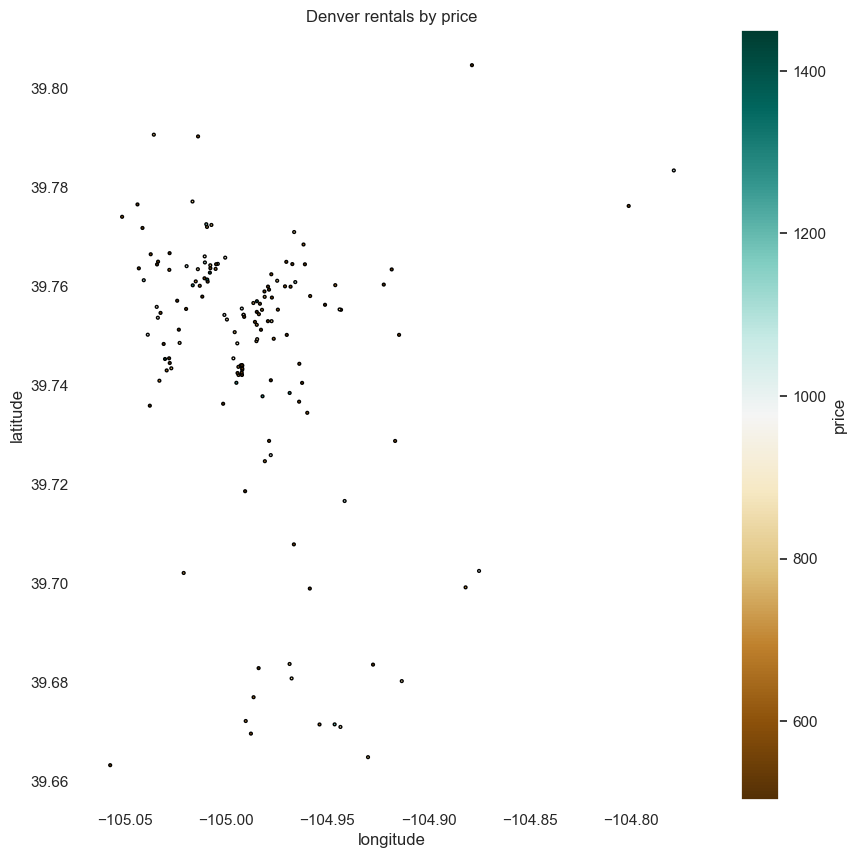

In [30]:
dg=df[df['price']>500]

dg.plot(kind='scatter',
       x='longitude',
        y='latitude',
        c='price',
        cmap='BrBG',
        edgecolors='black',
        figsize=(10,10),
        s= 4
        
       )
plt.title('Denver rentals by price')
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

In [31]:
df.corr()['price'].sort_values()


minimum_nights      -0.083233
longitude           -0.071208
number_of_reviews   -0.070718
reviews_per_month   -0.066076
host_id             -0.062467
                       ...   
bathrooms            0.574832
bedrooms             0.590614
accommodates         0.592710
25*k                 0.998345
price                1.000000
Name: price, Length: 61, dtype: float64

In [32]:
df['description'][39]

"Fire up the BBQ grill on the deck behind this spacious, renovated home. Find a private place to recharge with a custom curated interior, mid-century furnishings, a covered backyard dining area, a fire pit, and a basement games room. Wake up with a cup of coffee and a newspaper in the sun filled living room. Unwind with a book and a beverage on the shaded front porch or back patio. Newly redecorated with tons of light, 3 big screen TV's with Netflix, Prime and cable, living room, family room, private office, and free curbside parking.<br /><br /><b>License number</b><br />2017-BFN-0000039"

In [33]:
df.loc[39:39]

id  latitude  longitude  price shared_status  accommodates  \
39  5508840  39.75357 -104.88433  396.0   entire home             8   

   accomodation_group  bathrooms  bedrooms  beds_adjusted neighborhood  \
39                6-7        2.5       4.0            4.0    Stapleton   

    has_neighborhood_overview  has_reviews  \
39                          1            1   

                             listing_url  host_in_CO  \
39  https://www.airbnb.com/rooms/5508840           1   

    host_lives_in_neighborhood   host_id host_name host_response_time  \
39                           1  11839559    Cheryl     within an hour   

    host_response_rate  host_acceptance_rate  host_is_superhost  \
39                 1.0                   1.0                0.0   

   host_neighbourhood  host_listings_count  host_total_listings_count  \
39          Stapleton                  2.0                        3.0   

    host_has_profile_pic  host_identity_verified  has_host_about  \
39                   1.0                     1.0               1   

    years_hosting  years_of_reviews  license_listed  response_time  \
39            9.0               7.0               1            0.0   

    host_lives_in_neighborhood.1  \
39                             1   

                                                 name  \
39  Large Denver Home Centrally Located to Downtow...   

                                           host_about  \
39  I have lived in Colorado for over 25 years.  I...   

                                          description  \
39  Fire up the BBQ grill on the deck behind this ...   

                                neighborhood_overview  \
39  Centrally located in the award-winning communi...   

                                            amenities  minimum_nights  \
39  ["Coffee maker", "Washer", "Pack \u2019n play/...               4   

    maximum_nights min_stay_group max_stay_group  has_availability  \
39            1125           week      long_term                 1   

    instant_bookable  number_of_reviews  number_of_reviews_ltm  \
39                 0                 46                      8   

    number_of_reviews_l30d  review_scores_rating  review_scores_accuracy  \
39                       0                  4.96                    4.92   

    review_scores_cleanliness  review_scores_checkin  \
39                       4.92                    5.0   

    review_scores_communication  review_scores_location  review_scores_value  \
39                          5.0                     5.0                 4.92   

    reviews_per_month  bike_scores  walk_scores  \
39                0.5         70.0         71.0   

                                  property_page_links  transit_scores  \
39  https://www.walkscore.com/score/loc/lat=39.753...            39.0   

    name_sent_compound  name_sent_pos  name_sent_neg  name_sent_neu  \
39                 0.0            0.0            0.0            1.0   

    host_sent_compound  host_sent_pos  host_sent_neg  host_sent_neu  \
39              0.7269          0.179            0.0          0.821   

    description_sent_compound  description_sent_pos  description_sent_neg  \
39                     -0.128                 0.035                 0.051   

    description_sent_neu  neighborhood_sent_compound  neighborhood_sent_pos  \
39                 0.914                      0.8519                  0.117   

    neighborhood_sent_neg  neighborhood_sent_neu  25*k group_size  
39                    0.0                  0.883  16.0        6-7

In [34]:
df[df['description_sent_compound']<.7]

id   latitude   longitude  price shared_status  \
32                154999  39.744390 -104.989270   80.0   entire home   
39               5508840  39.753570 -104.884330  396.0   entire home   
68               6065081  39.719130 -104.982000  100.0   entire home   
73                575758  39.765610 -104.979450  200.0   entire home   
81               3605358  39.733080 -104.979960  115.0  private room   
...                  ...        ...         ...    ...           ...   
5191  721728139592829478  39.722830 -104.893160  147.0   entire home   
5194  783402484236035390  39.744610 -104.965420   84.0   entire home   
5196  784733690159810914  39.744950 -104.895100   78.0   entire home   
5201  786312450504158550  39.802397 -104.769222   41.0  private room   
5206  722474863388922514  39.755405 -105.001024  199.0   entire home   

      accommodates accomodation_group  bathrooms  bedrooms  beds_adjusted  \
32               2                0-2        1.0       1.0            1.0   
39               8                6-7        2.5       4.0            4.0   
68               2                0-2        1.0       1.0            1.0   
73               4                3-4        1.0       2.0            2.0   
81               2                0-2        1.0       1.0            1.0   
...            ...                ...        ...       ...            ...   
5191             2                0-2        1.5       1.0            1.0   
5194             2                0-2        1.0       1.0            1.0   
5196             6                5-6        2.0       3.0            3.0   
5201             2                0-2        1.0       1.0            1.0   
5206             4                3-4        1.0       1.0            1.0   

        neighborhood  has_neighborhood_overview  has_reviews  \
32               CBD                          0            1   
39         Stapleton                          1            1   
68             Speer                          1            1   
73       Five Points                          1            1   
81      Capitol Hill                          1            1   
...              ...                        ...          ...   
5191     Lowry Field                          0            0   
5194  City Park West                          0            0   
5196     East Colfax                          0            0   
5201             DIA                          0            0   
5206   Union Station                          0            1   

                                          listing_url  host_in_CO  \
32                https://www.airbnb.com/rooms/154999           1   
39               https://www.airbnb.com/rooms/5508840           1   
68               https://www.airbnb.com/rooms/6065081           1   
73                https://www.airbnb.com/rooms/575758           1   
81               https://www.airbnb.com/rooms/3605358           1   
...                                               ...         ...   
5191  https://www.airbnb.com/rooms/721728139592829478           1   
5194  https://www.airbnb.com/rooms/783402484236035390           0   
5196  https://www.airbnb.com/rooms/784733690159810914           1   
5201  https://www.airbnb.com/rooms/786312450504158550           1   
5206  https://www.airbnb.com/rooms/722474863388922514           1   

      host_lives_in_neighborhood    host_id host_name  host_response_time  \
32                             0     745200     Susan      within an hour   
39                             1   11839559    Cheryl      within an hour   
68                             1   31481199       Dan                 NaN   
73                             1    2832150     Kerry                 NaN   
81                             1   18168193   Georgia      within an hour   
...                          ...        ...       ...                 ...   
5191                           0  445697747       Tim  within a few hours   
5194              